In this example we use AdOSE method.

# Import Packages

In [1]:
from __future__ import absolute_import, division, print_function
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, clear_output

np.set_printoptions(precision=5 , suppress=True)

In [2]:
# import AdOSE package
from adose import *

## DATA

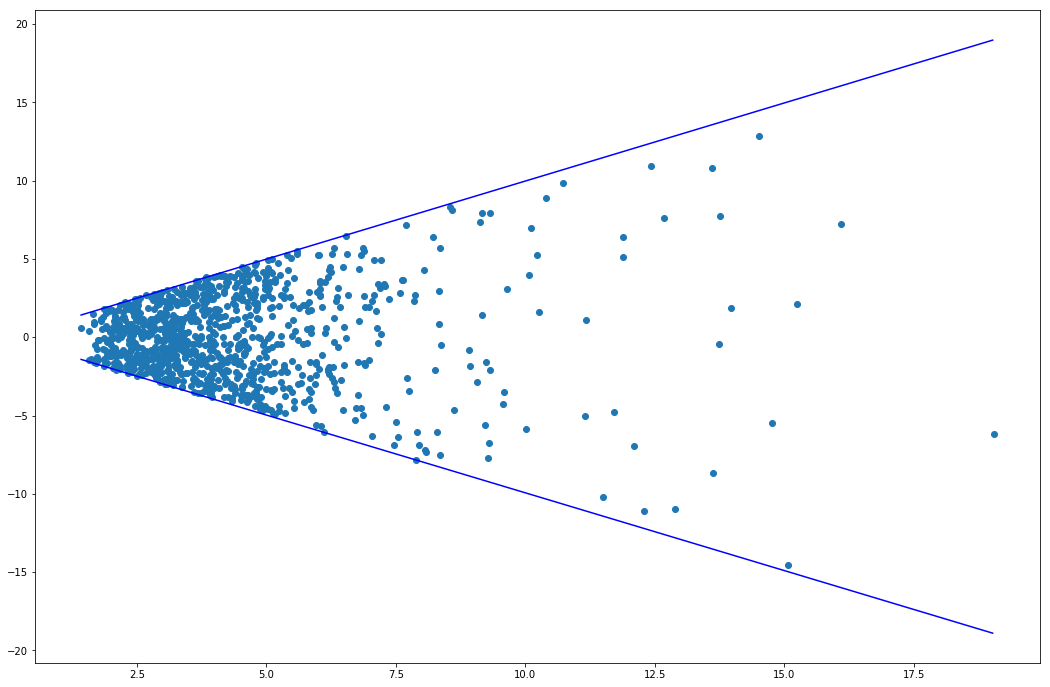

In [93]:
np.random.seed(30)
dimX = 2
dimY = 1
n_samples = 1000
X2 = np.random.rand(n_samples,1)*2-1#np.random.gamma(shape=1, size=(n_samples,1), scale=1)
X1 = np.random.lognormal(mean=1, sigma=0.6, size=(n_samples,1))+1#np.random.rand(n_samples,1)*2-1


FuncX = X1*X2 #np.exp(-np.power(X1,2)*np.power(X2,2))
Y_biased = FuncX
Y = Y_biased #- np.mean(Y_biased)

MeanX = np.mean(X1)
StdX = np.std(X1)
MeanY = np.mean(Y)
StdY = np.std(Y)

Hx = np.arange(np.min(X1),np.max(X1),0.05)[np.newaxis].T
Func1HX = Hx*np.min(X2) #np.exp(-np.power(Hx,2))
Func2HX = Hx*np.max(X2) #np.exp(-np.power(Hx,2)*0)

plt.figure(1, figsize=(18,12))
plt.scatter(X1, Y)
plt.plot(Hx, Func1HX,'b')
plt.plot(Hx, Func2HX, 'b')
plt.show()

In [95]:
# struct new model using adose class
MODEL1 = adose(NumOfRegressors=1, BatchSize=256)

In [96]:
# add dense layers (fully_connected) to random generator network.
MODEL1.RanGen_GetDenseLayer(LayerID='hidden1', LayerSize=10, Activation=tf.nn.leaky_relu,
                            WeightInitializer=tf.initializers.constant(value=0),
                            BiasInitializer=tf.initializers.random_uniform(minval=-1, maxval=+1))
MODEL1.RanGen_GetDenseLayer(LayerID='out', LayerSize=1, Activation=None,
                            WeightInitializer=tf.initializers.constant(value=0),
                            BiasInitializer=tf.initializers.random_uniform(minval=-1, maxval=+1))

In [97]:
# add dense layers (fully_connected) to regression network.
MODEL1.Reg_GetDenseLayer(LayerID='hidden1', LayerSize=6, Activation=tf.nn.tanh,
                        WeightInitializer=tf.contrib.layers.xavier_initializer(),
                        BiasInitializer=tf.contrib.layers.xavier_initializer())
MODEL1.Reg_GetDenseLayer(LayerID='hidden2', LayerSize=6, Activation=tf.nn.sigmoid,
                        WeightInitializer=tf.contrib.layers.xavier_initializer(),
                        BiasInitializer=tf.contrib.layers.xavier_initializer())
MODEL1.Reg_GetDenseLayer(LayerID='hidden3', LayerSize=6, Activation=tf.nn.leaky_relu,
                        WeightInitializer=tf.contrib.layers.xavier_initializer(),
                        BiasInitializer=tf.contrib.layers.xavier_initializer())
MODEL1.Reg_GetDenseLayer(LayerID='out', LayerSize=1, Activation=None,
                        WeightInitializer=tf.contrib.layers.xavier_initializer(),
                        BiasInitializer=tf.contrib.layers.xavier_initializer())

In [98]:
# add dense layers (fully_connected) to KL-divergence network.
MODEL1.KL_GetDenseLayer(LayerID='hidden1', LayerSize=30, Activation=tf.nn.leaky_relu,
                       WeightInitializer=tf.contrib.layers.xavier_initializer(),
                       BiasInitializer=tf.contrib.layers.xavier_initializer())
MODEL1.KL_GetDenseLayer(LayerID='hidden2', LayerSize=30, Activation=tf.nn.leaky_relu,
                       WeightInitializer=tf.contrib.layers.xavier_initializer(),
                       BiasInitializer=tf.contrib.layers.xavier_initializer())
MODEL1.KL_GetDenseLayer(LayerID='hidden3', LayerSize=30, Activation=tf.nn.leaky_relu,
                       WeightInitializer=tf.contrib.layers.xavier_initializer(),
                       BiasInitializer=tf.contrib.layers.xavier_initializer())
# specify 'out' for last layer. it forces model not to add bias term to this layer
MODEL1.KL_GetDenseLayer(LayerID='out', LayerSize=1, Activation=None,
                       WeightInitializer=tf.contrib.layers.xavier_initializer(),
                       BiasInitializer=tf.contrib.layers.xavier_initializer())

In [99]:
# when the structure of network is constructed, call 'ConstructGraph' method. it creates the whole computational graph
MODEL1.ConstructGraph()

In [100]:
# specify optimizer for each net
MODEL1.Reg_DefineOptimizer(optimizer=tf.train.AdamOptimizer, beta1=0.9, beta2=0.999)
MODEL1.KL_DefineOptimizer(optimizer=tf.train.AdamOptimizer, beta1=0.9, beta2=0.999)

In [101]:
# you can create tensorboard summary. list of scalers and histograms can be changed by 'Options' input
MODEL1.TensorboardSummaryCreator(directory="summaries\\AdOSE09")

iteration: 0    Estimated Entropy of Residual:  1.3241607141783267


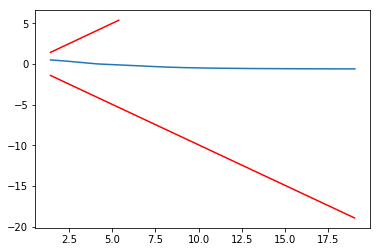

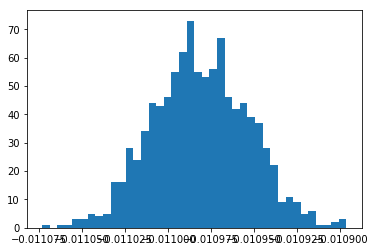

iteration: 50    Estimated Entropy of Residual:  1.959618873589478


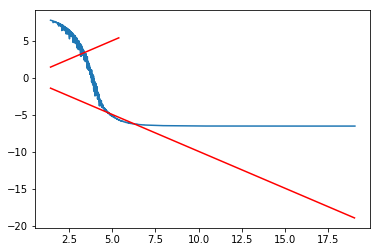

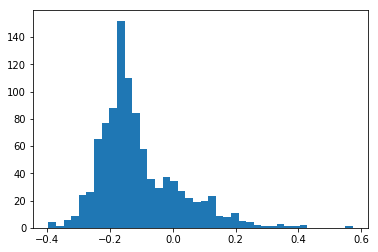

iteration: 100    Estimated Entropy of Residual:  1.7671758621567766


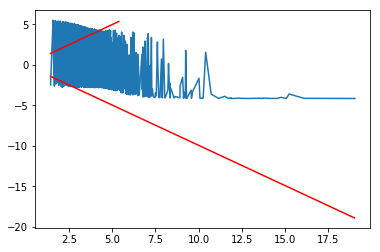

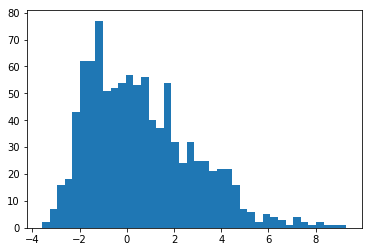

iteration: 150    Estimated Entropy of Residual:  1.5073846851635504


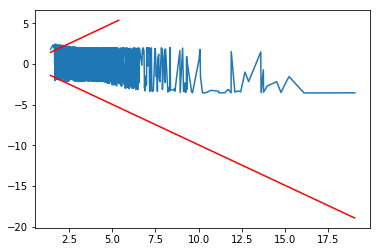

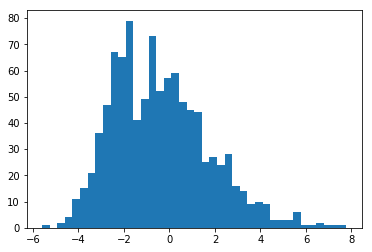

iteration: 200    Estimated Entropy of Residual:  1.5872000779910178


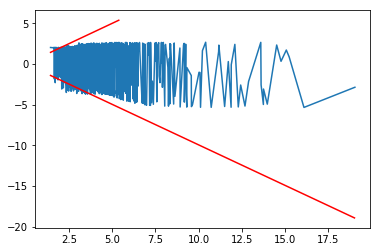

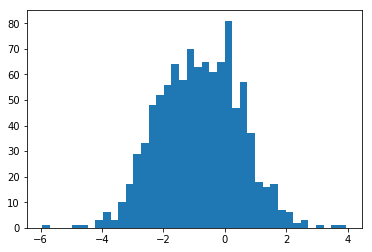

iteration: 250    Estimated Entropy of Residual:  1.6383742130864158


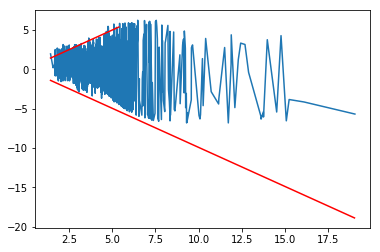

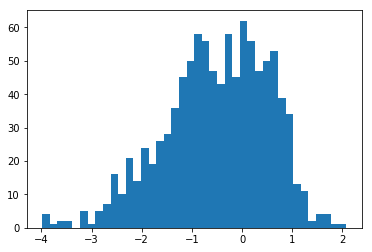

iteration: 300    Estimated Entropy of Residual:  1.6416081424650102


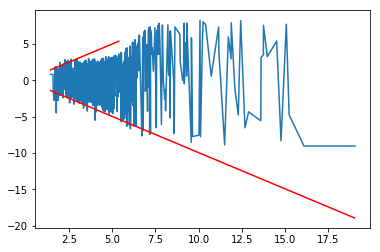

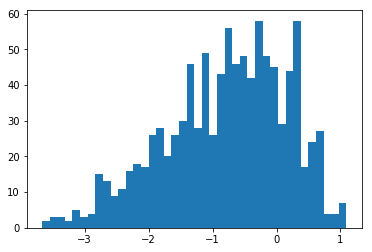

iteration: 350    Estimated Entropy of Residual:  1.6771145631000315


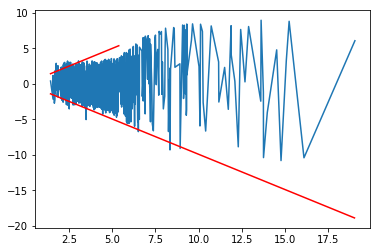

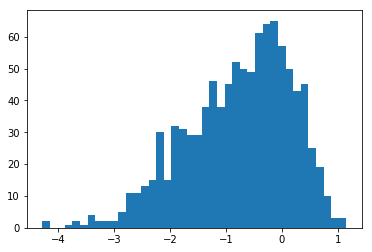

iteration: 400    Estimated Entropy of Residual:  1.6466089765495506


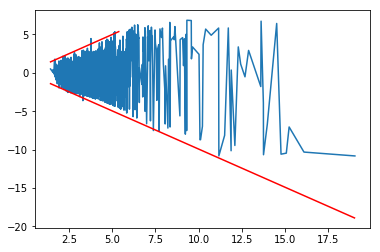

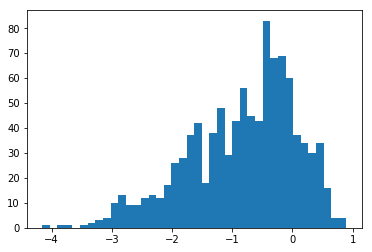

iteration: 450    Estimated Entropy of Residual:  1.7089299634768835


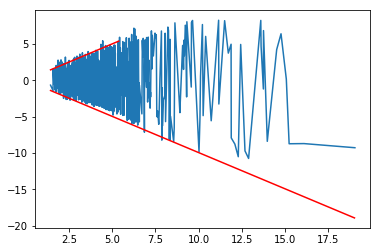

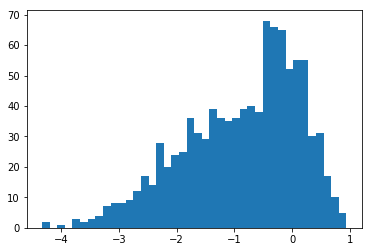

iteration: 500    Estimated Entropy of Residual:  1.6154745473784602


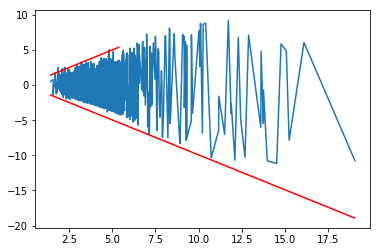

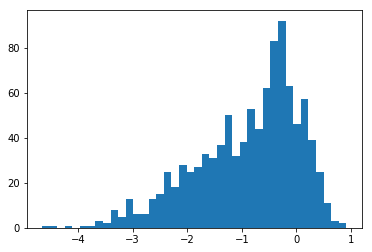

iteration: 550    Estimated Entropy of Residual:  1.6605728607211527


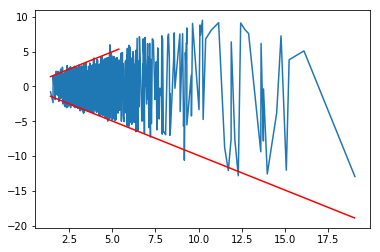

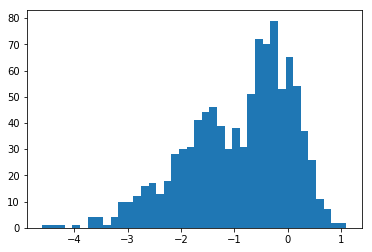

iteration: 600    Estimated Entropy of Residual:  1.650572765489239


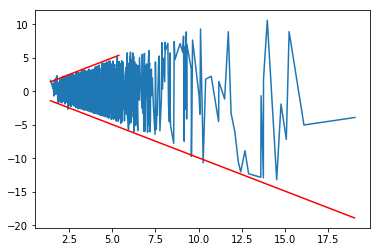

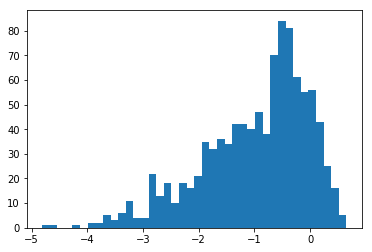

iteration: 650    Estimated Entropy of Residual:  1.6643411444679392


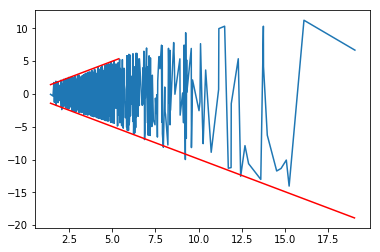

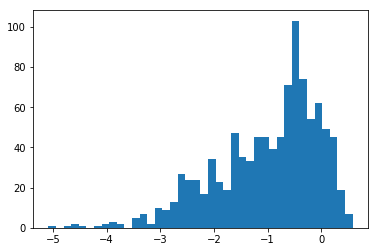

iteration: 700    Estimated Entropy of Residual:  1.641293731588096


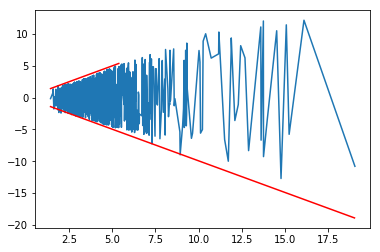

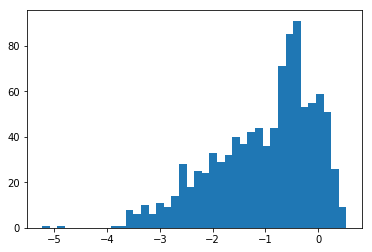

iteration: 750    Estimated Entropy of Residual:  1.6245106473811899


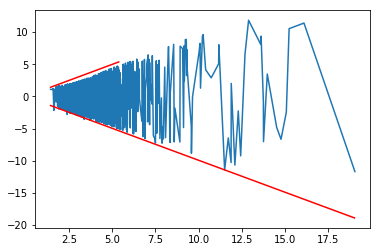

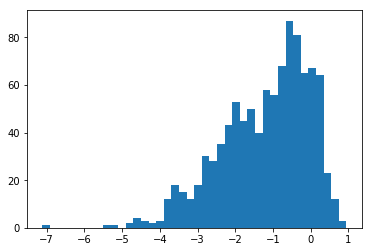

iteration: 800    Estimated Entropy of Residual:  1.6493878207177564


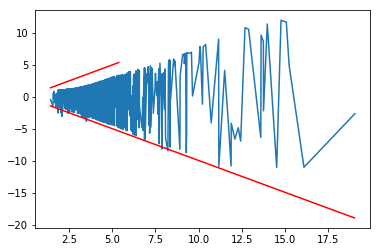

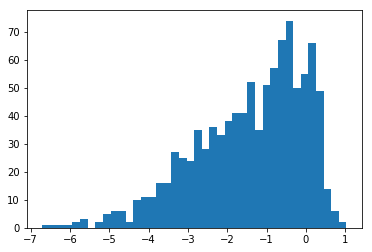

iteration: 850    Estimated Entropy of Residual:  1.6629785635951828


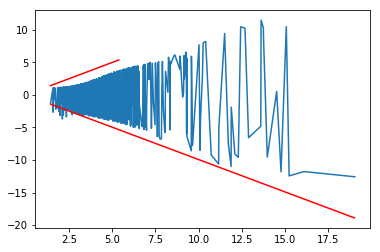

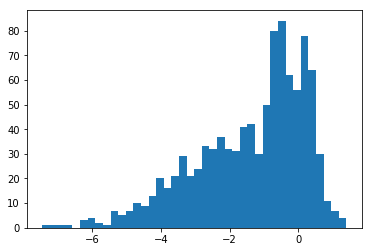

iteration: 900    Estimated Entropy of Residual:  1.5497262124305475


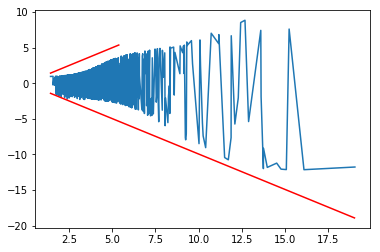

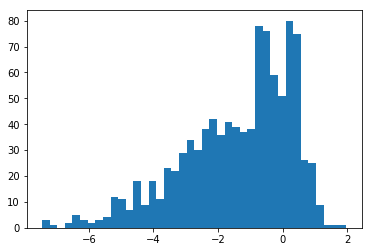

iteration: 950    Estimated Entropy of Residual:  1.5387966965758797


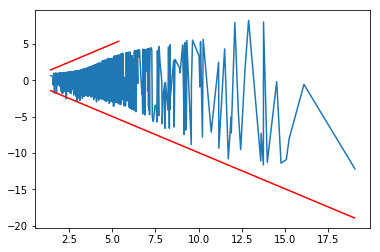

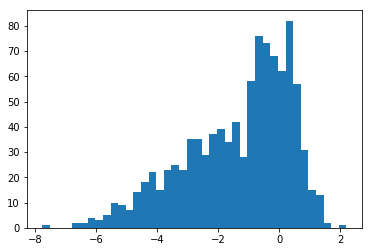

iteration: 1000    Estimated Entropy of Residual:  1.5946618261224437


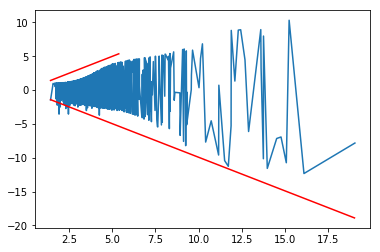

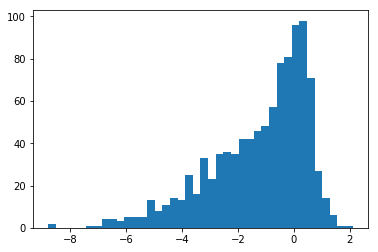

iteration: 1050    Estimated Entropy of Residual:  1.531111212651838


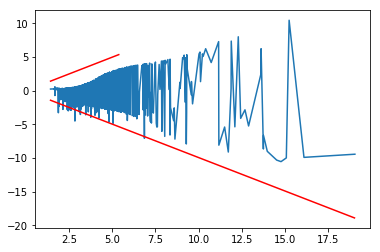

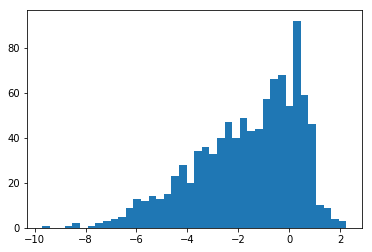

iteration: 1100    Estimated Entropy of Residual:  1.6741785789537915


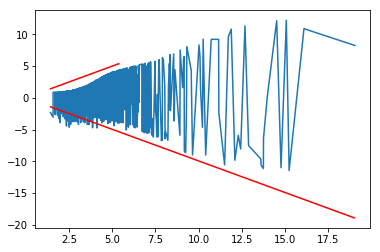

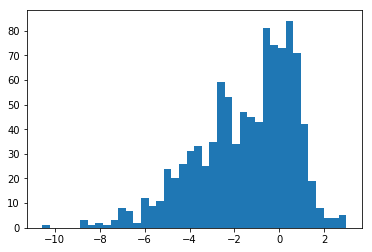

iteration: 1150    Estimated Entropy of Residual:  1.5547232089011573


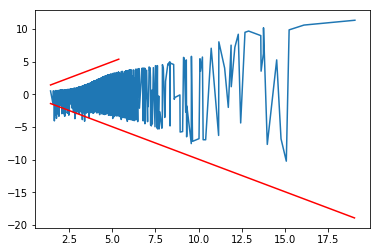

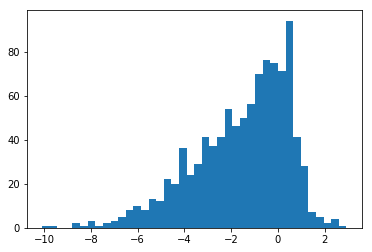

iteration: 1200    Estimated Entropy of Residual:  1.5670777943504937


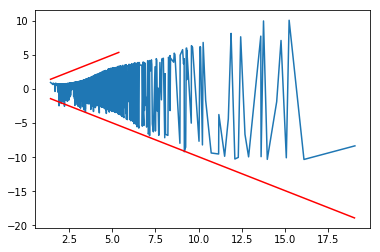

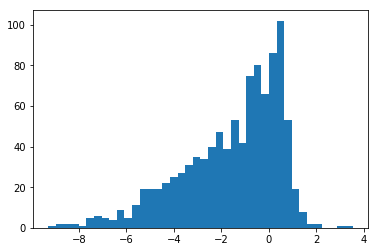

iteration: 1250    Estimated Entropy of Residual:  1.4916519883354429


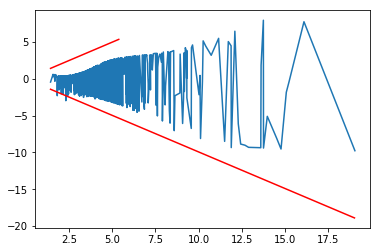

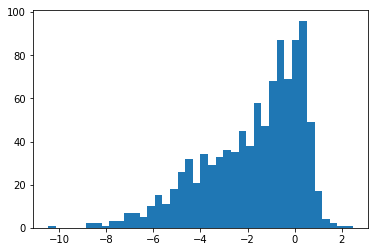

iteration: 1300    Estimated Entropy of Residual:  1.5789351924550106


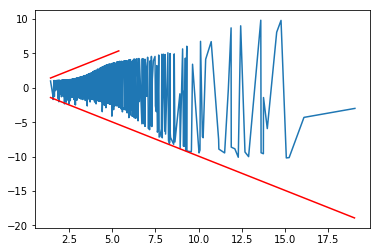

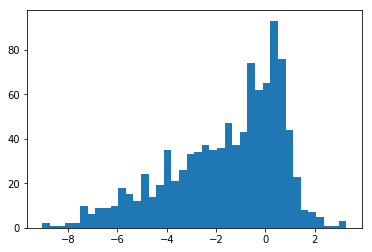

iteration: 1350    Estimated Entropy of Residual:  1.642321498051118


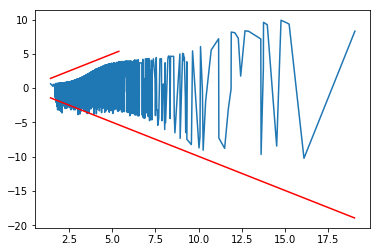

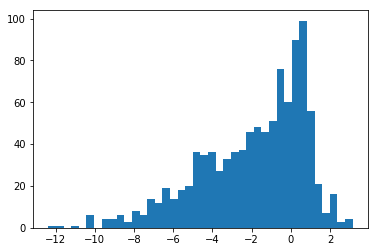

iteration: 1400    Estimated Entropy of Residual:  1.5884427993401706


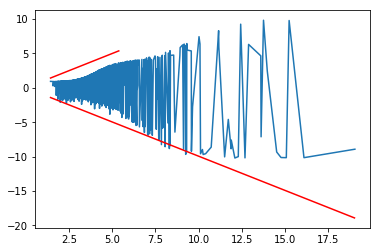

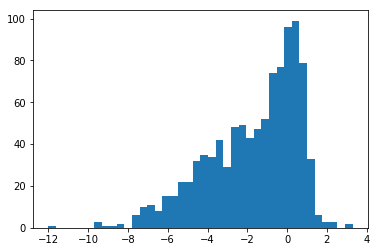

iteration: 1450    Estimated Entropy of Residual:  1.5345074129575074


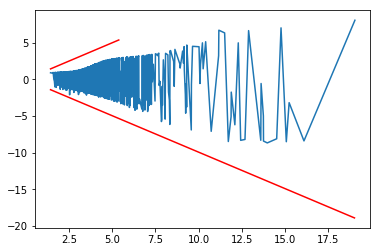

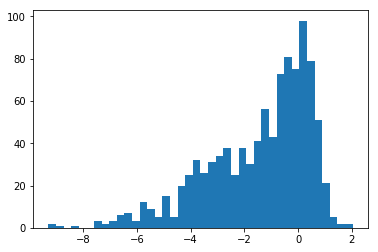

iteration: 1500    Estimated Entropy of Residual:  1.5872170669703252


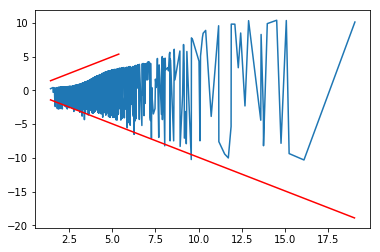

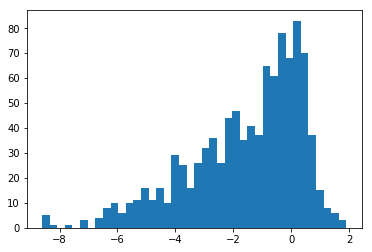

iteration: 1550    Estimated Entropy of Residual:  1.4729395540980335


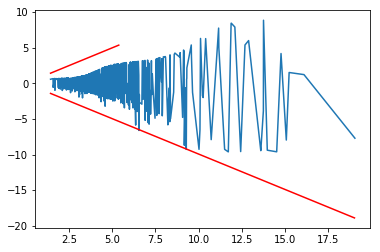

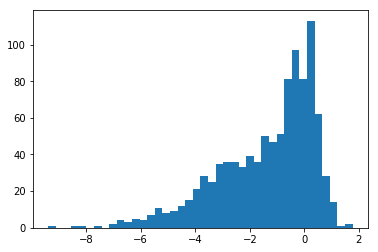

iteration: 1600    Estimated Entropy of Residual:  1.5945729479478192


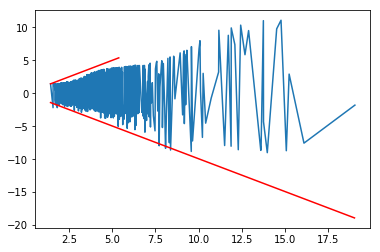

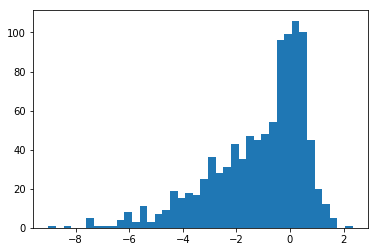

iteration: 1650    Estimated Entropy of Residual:  1.5351053718568588


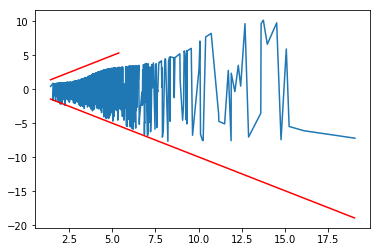

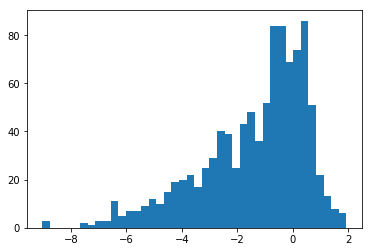

iteration: 1700    Estimated Entropy of Residual:  1.6331516344356536


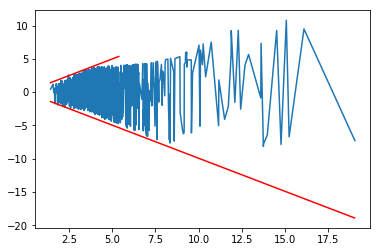

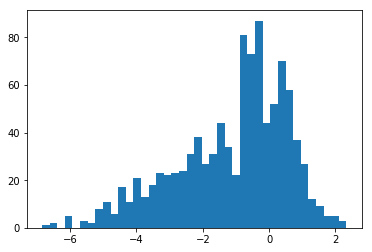

iteration: 1750    Estimated Entropy of Residual:  1.7399764838881708


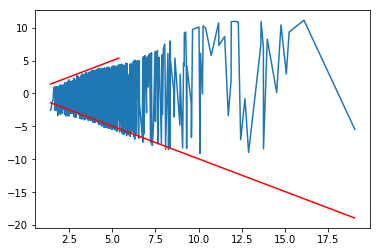

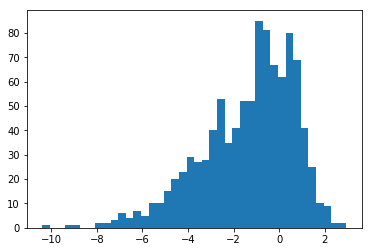

iteration: 1800    Estimated Entropy of Residual:  1.6681647346411053


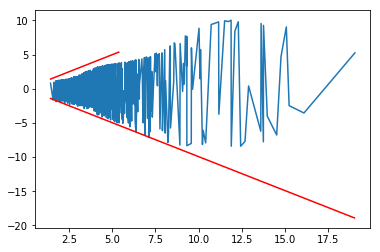

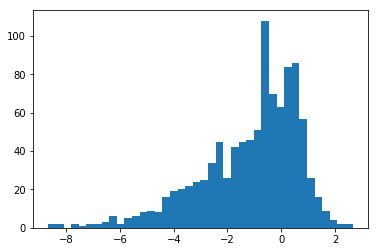

iteration: 1850    Estimated Entropy of Residual:  1.5663078598310785


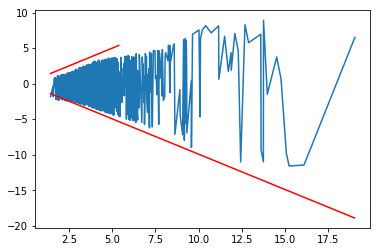

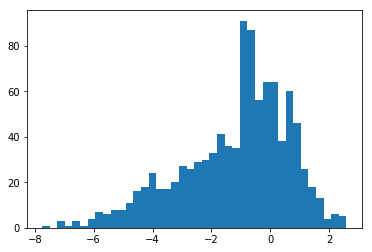

iteration: 1900    Estimated Entropy of Residual:  1.6085393337673772


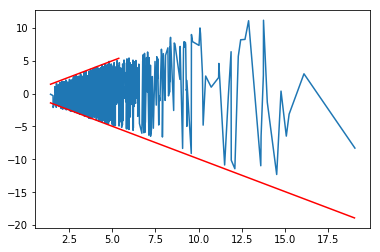

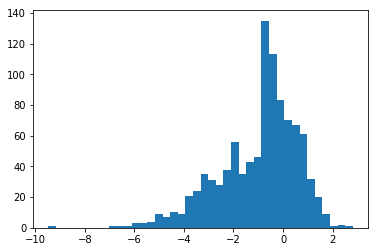

iteration: 1950    Estimated Entropy of Residual:  1.6491226748240404


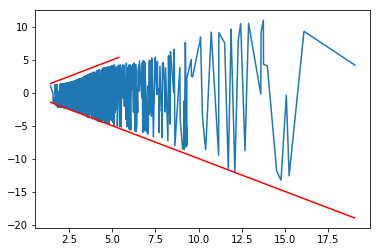

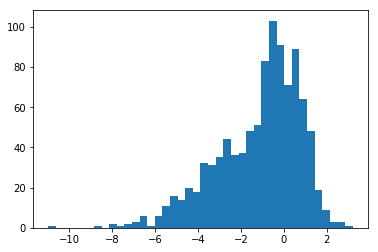

iteration: 2000    Estimated Entropy of Residual:  1.7017086912551442


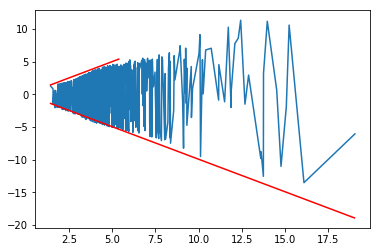

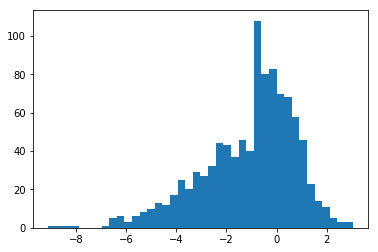

iteration: 2050    Estimated Entropy of Residual:  1.6662311646435115


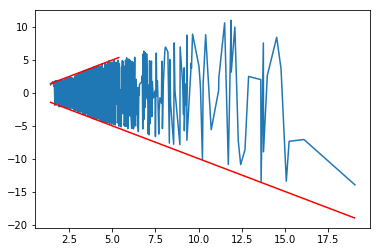

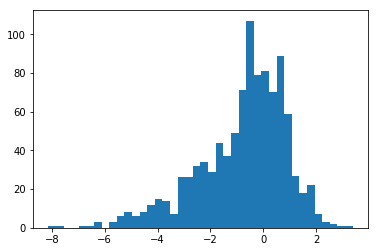

iteration: 2100    Estimated Entropy of Residual:  1.64692416035153


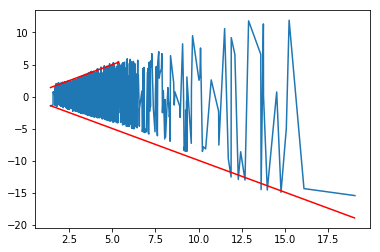

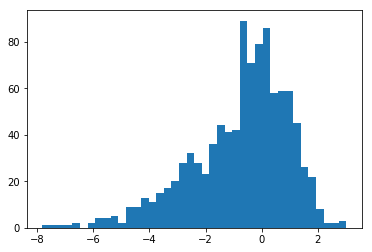

iteration: 2150    Estimated Entropy of Residual:  1.6389728892631954


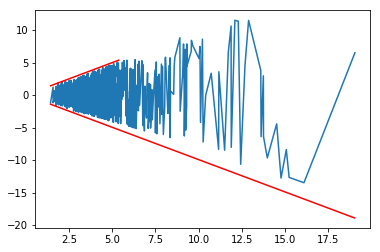

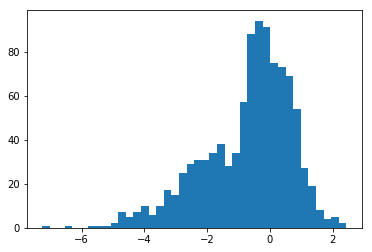

iteration: 2200    Estimated Entropy of Residual:  1.6181217331560038


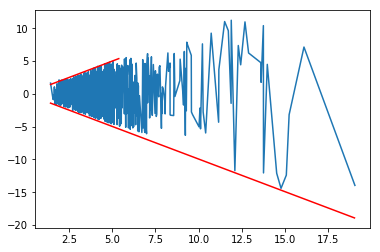

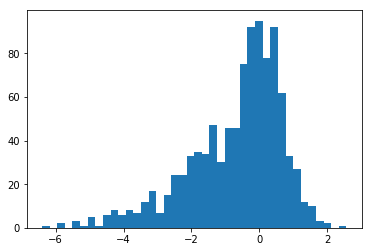

iteration: 2250    Estimated Entropy of Residual:  1.5931026948003706


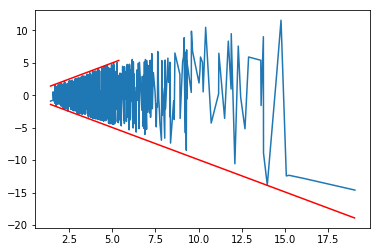

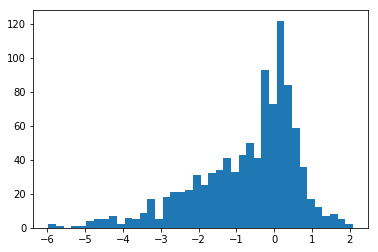

iteration: 2300    Estimated Entropy of Residual:  1.6237705520195358


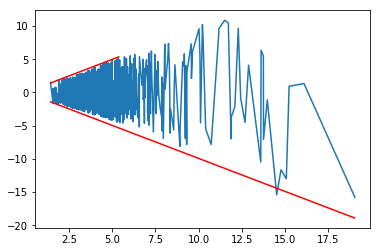

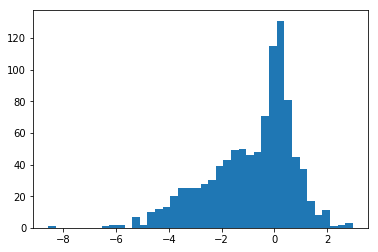

iteration: 2350    Estimated Entropy of Residual:  1.6853985637242679


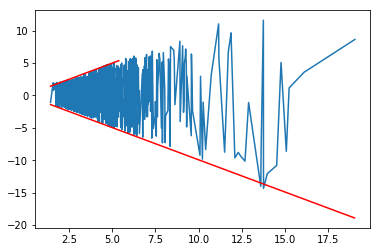

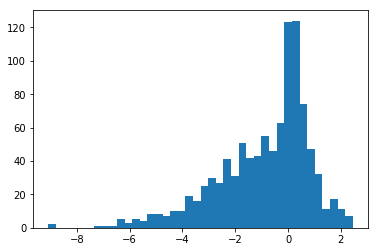

iteration: 2400    Estimated Entropy of Residual:  1.6295162209613867


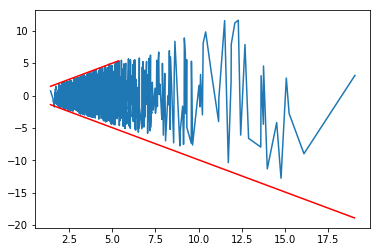

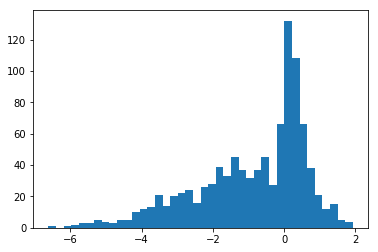

iteration: 2450    Estimated Entropy of Residual:  1.688610245527841


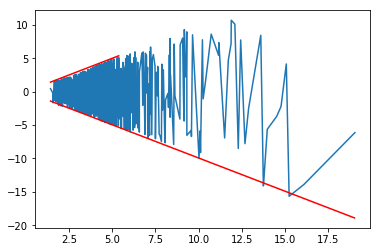

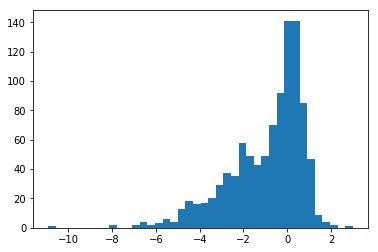

iteration: 2500    Estimated Entropy of Residual:  1.577812342832424


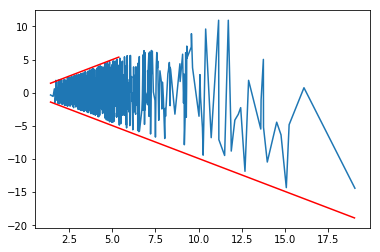

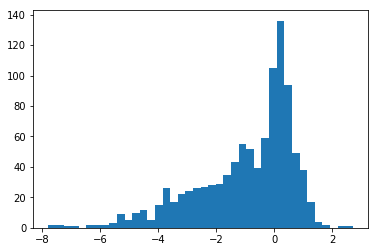

iteration: 2550    Estimated Entropy of Residual:  1.6190921918499974


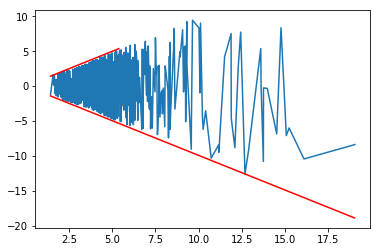

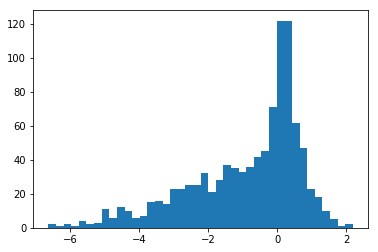

iteration: 2600    Estimated Entropy of Residual:  1.6737456194891664


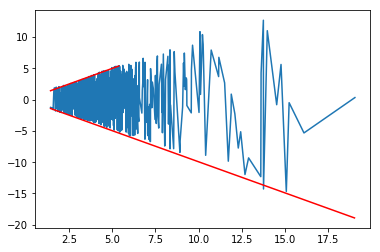

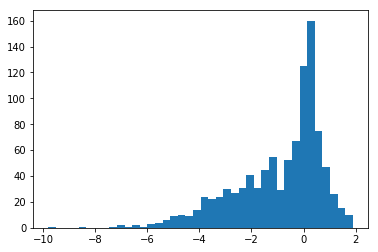

iteration: 2650    Estimated Entropy of Residual:  1.619652399071513


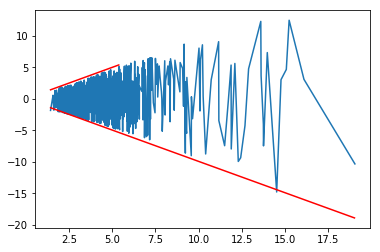

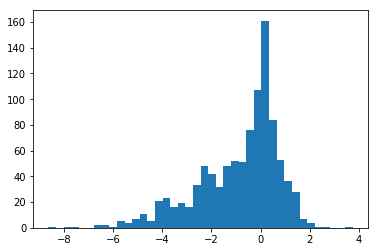

iteration: 2700    Estimated Entropy of Residual:  1.679922643037588


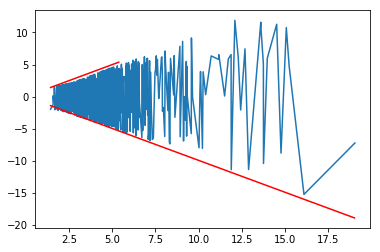

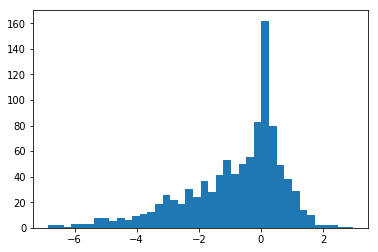

iteration: 2750    Estimated Entropy of Residual:  1.6580829096336687


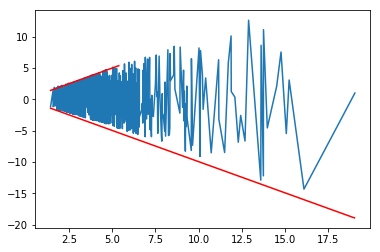

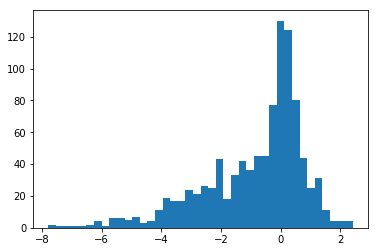

iteration: 2800    Estimated Entropy of Residual:  1.584099283949644


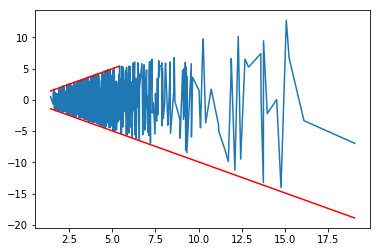

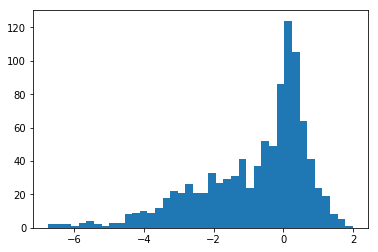

iteration: 2850    Estimated Entropy of Residual:  1.691956956941893


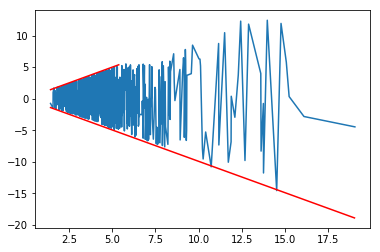

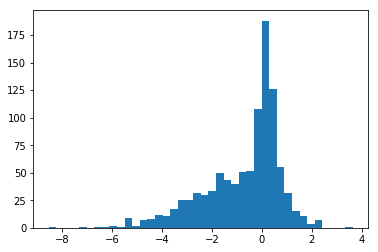

iteration: 2900    Estimated Entropy of Residual:  1.6067226286913554


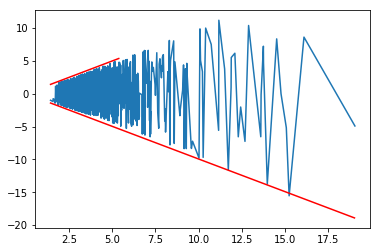

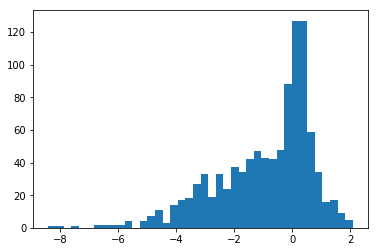

iteration: 2950    Estimated Entropy of Residual:  1.74686561922179


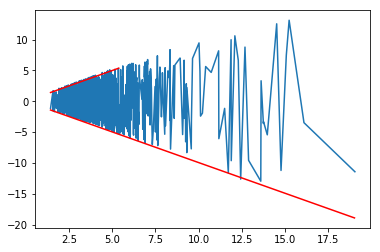

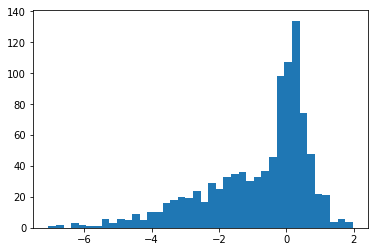

iteration: 3000    Estimated Entropy of Residual:  1.6927541107665927


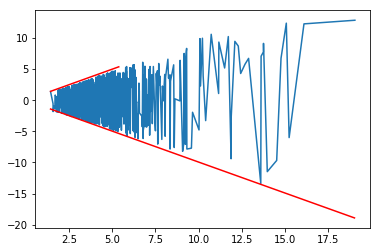

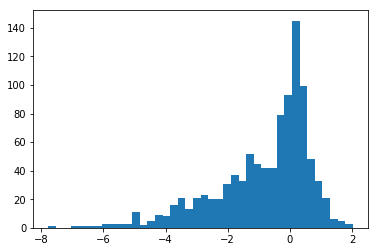

iteration: 3050    Estimated Entropy of Residual:  1.6886078452955755


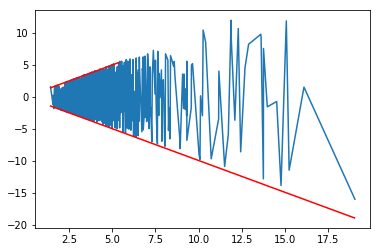

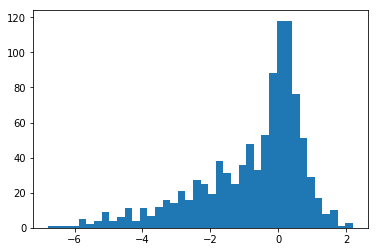

iteration: 3100    Estimated Entropy of Residual:  1.6085315383969787


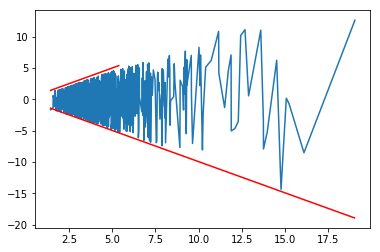

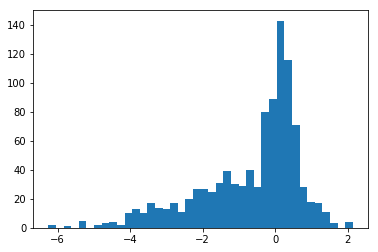

iteration: 3150    Estimated Entropy of Residual:  1.634378104196455


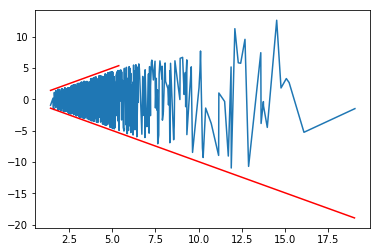

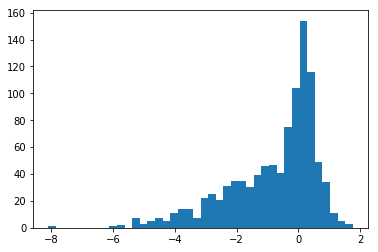

iteration: 3200    Estimated Entropy of Residual:  1.638146928503648


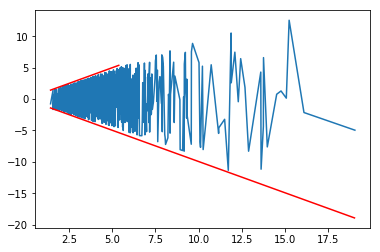

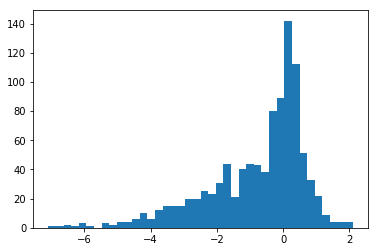

iteration: 3250    Estimated Entropy of Residual:  1.646002523503408


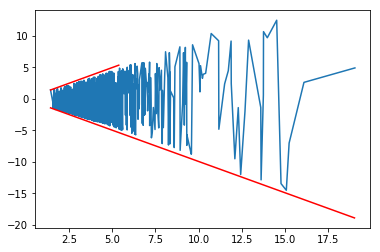

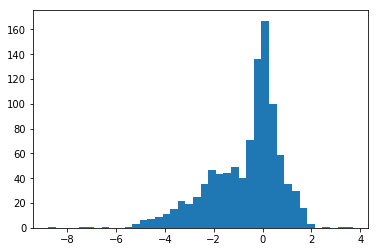

iteration: 3300    Estimated Entropy of Residual:  1.7087270050970171


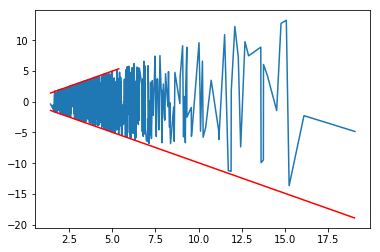

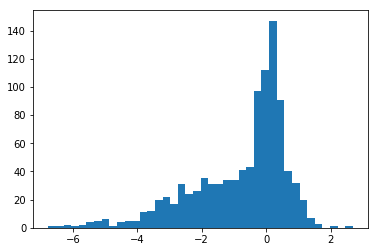

iteration: 3350    Estimated Entropy of Residual:  1.640654923432768


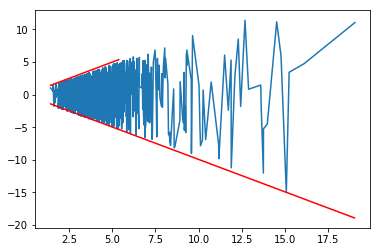

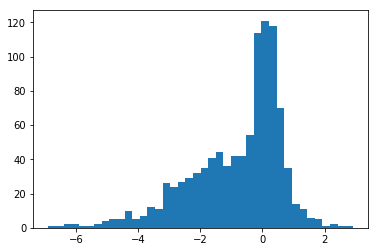

iteration: 3400    Estimated Entropy of Residual:  1.6191766195540591


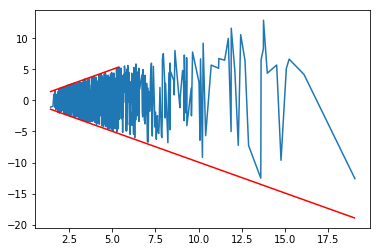

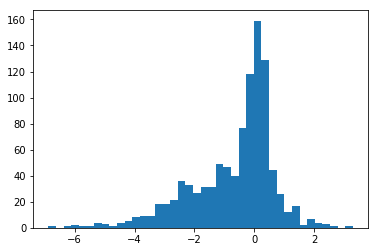

iteration: 3450    Estimated Entropy of Residual:  1.6271155468156508


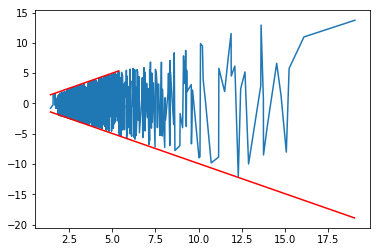

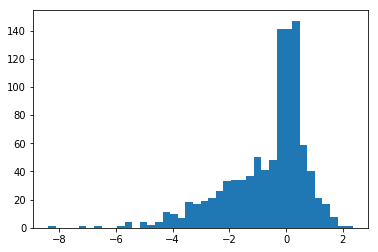

iteration: 3500    Estimated Entropy of Residual:  1.630842188981343


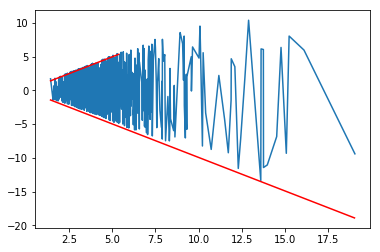

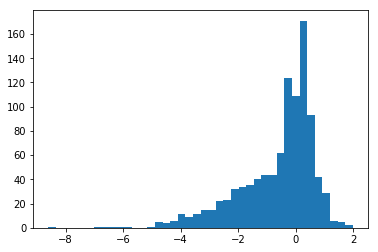

iteration: 3550    Estimated Entropy of Residual:  1.6185563767721582


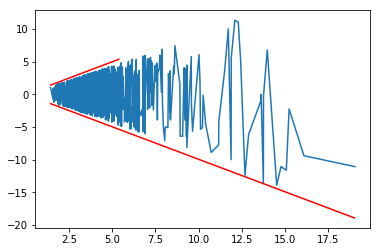

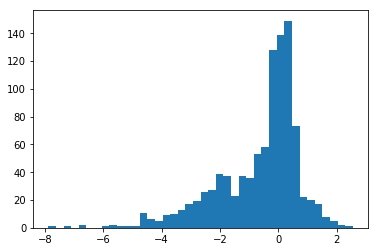

iteration: 3600    Estimated Entropy of Residual:  1.6469116853732406


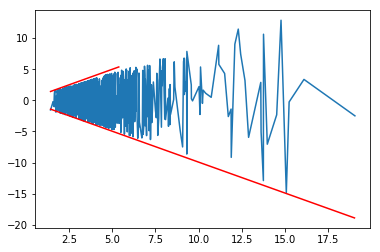

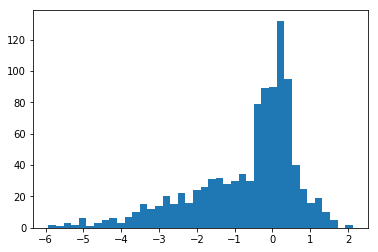

iteration: 3650    Estimated Entropy of Residual:  1.6270029653965246


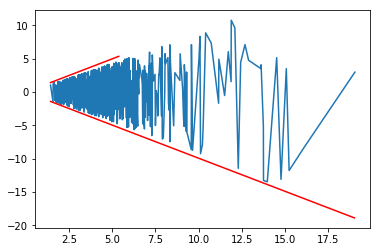

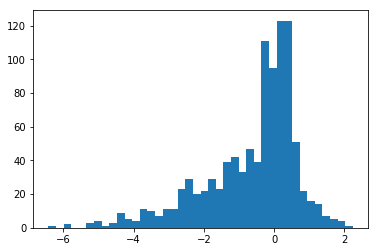

iteration: 3700    Estimated Entropy of Residual:  1.6308649055499789


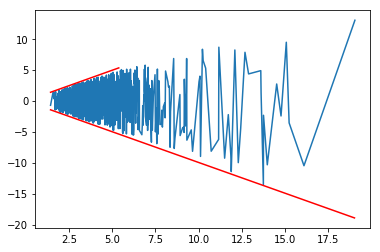

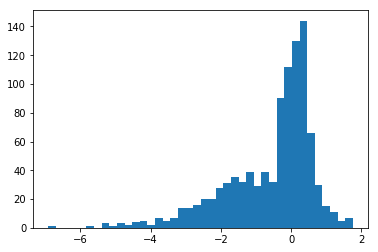

iteration: 3750    Estimated Entropy of Residual:  1.6226598988930316


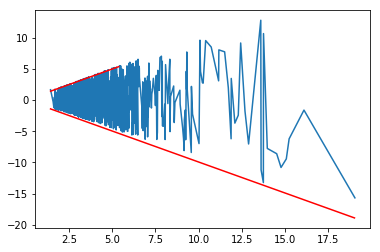

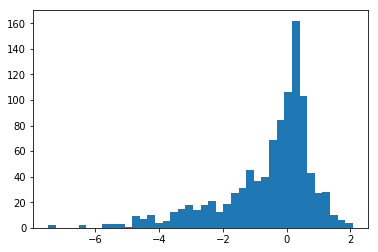

iteration: 3800    Estimated Entropy of Residual:  1.638751473402818


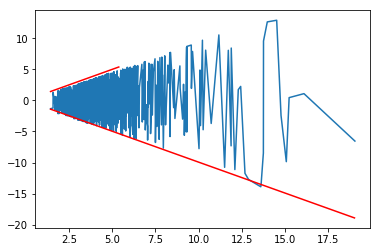

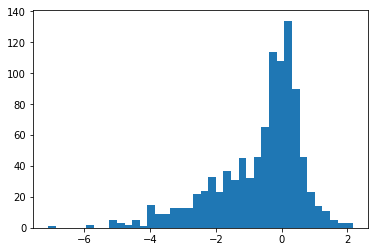

iteration: 3850    Estimated Entropy of Residual:  1.5983464506758622


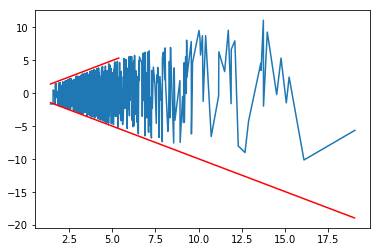

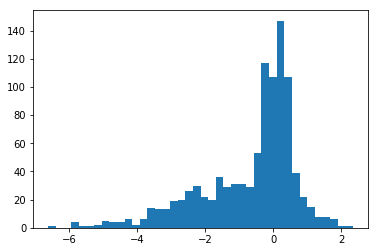

iteration: 3900    Estimated Entropy of Residual:  1.660380172080571


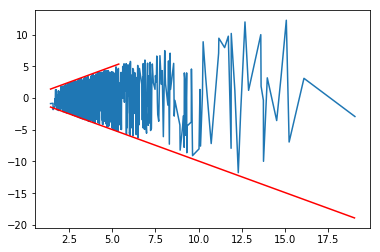

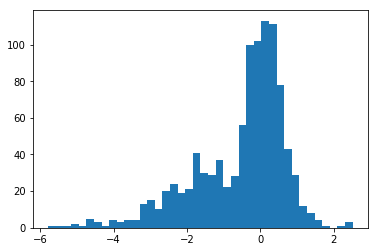

iteration: 3950    Estimated Entropy of Residual:  1.6786080687043357


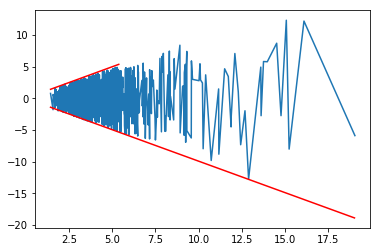

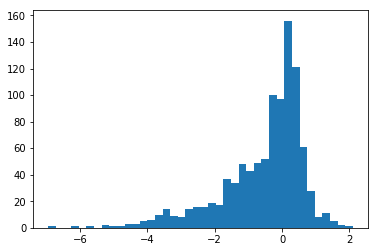

In [102]:
RLearnRate = 0.0005
KLLearnRate = 0.0005

nReg_Steps = 10
nKL_Steps = 10

MaxIters = 4000
MinIters = 4000



config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.9 # making sure Tensorflow doesn't overflow the GPU

MODEL1.GetSession(config=config)



for iters in range(MaxIters):
    
    RandomNum = np.random.randn(np.shape(Y)[0],np.shape(Y)[1])
    
    
    
    AllPredicts, _, R_loss, _, _, Res_Entr = MODEL1.UpdateRegNet(X=(X1-MeanX)/StdX, Y=(Y-MeanY)/StdY, RandomIn=RandomNum,
                                                                 iteration=iters, RegLearnRate=RLearnRate, nReg_Steps=nReg_Steps)
    
    _ = MODEL1.UpdateKLNet(X=(X1-MeanX)/StdX, Y=(Y-MeanY)/StdY, RandomIn=RandomNum,
                           iteration=iters, KLLearnRate=KLLearnRate, nKL_Steps=nKL_Steps)
    
    _, _ = MODEL1.TestModel(X=(X1-MeanX)/StdX, Y=(Y-MeanY)/StdY, RandomIn=RandomNum, iteration=iters)
    
    
    nKL_Steps = np.min([40, np.max([5, np.int32(30-25*R_loss)])])#np.min([30, np.int32(30/np.exp(0.056*R_loss))])
    nReg_Steps = np.min([40, np.max([5, np.int32(30+25*R_loss)])])#np.min([30, np.int32(30/np.exp(-0.056*R_loss))])
    
    
    
    if iters%50 == 0:
        Imlists = sorted(zip(*[X1, AllPredicts*StdY+MeanY+np.mean(FuncX)-np.mean(AllPredicts*StdY+MeanY)]))
        new_x, new_y = list(zip(*Imlists))
        
        print('iteration:', iters , '   Estimated Entropy of Residual: ', Res_Entr)
        
        plt.plot(new_x, new_y)
        plt.plot(Hx, Func1HX, 'r')
        plt.plot(Hx[0:80], Func2HX[0:80], 'r')
        plt.show()
        
        AllDist = MODEL1.GetDist(RandomNum)
        plt.figure()
        plt.hist(np.ravel(AllDist), bins=40)
        plt.show()
    
    
    
    


# predictions after training
RandomNum = np.random.randn(np.shape(Y)[0],np.shape(Y)[1])
AllPredictsAfterTrain = MODEL1.PredictAfterTrain(X=(X1-MeanX)/StdX, RandomIn=RandomNum)
Imlists = sorted(zip(*[X1, AllPredictsAfterTrain*StdY+MeanY+np.mean(FuncX)-np.mean(AllPredictsAfterTrain*StdY+MeanY)]))
new_x_AT, new_y_AT = list(zip(*Imlists))


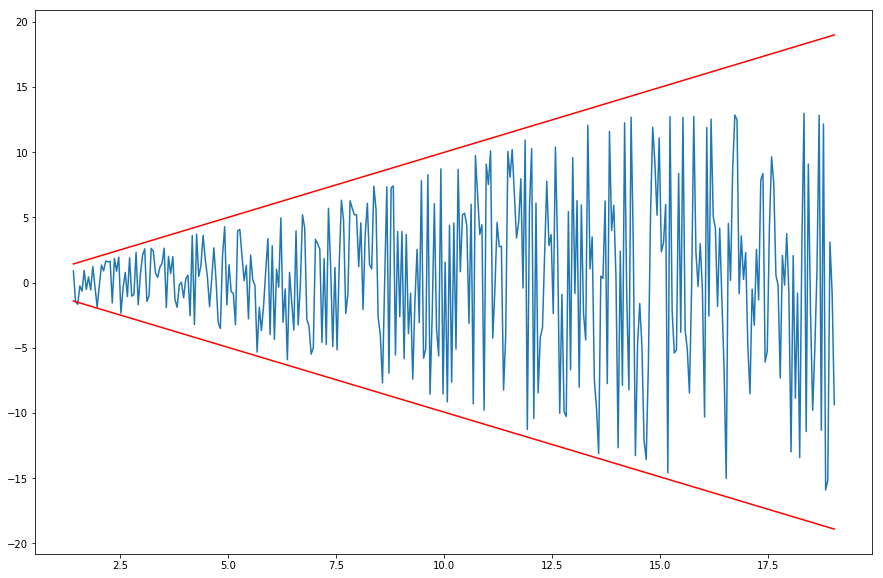

In [103]:
HHx = np.arange(-2,2,0.01)[np.newaxis].T

AllPredictsFixed = MODEL1.PredictAfterTrain(X=(Hx-MeanX)/StdX, RandomIn=np.ones_like(HHx)*(0))
Imlists = sorted(zip(*[Hx, AllPredictsFixed*StdY+MeanY]))
new_x_F, new_y_F = list(zip(*Imlists))

plt.figure(figsize=(15,10))
plt.plot(Hx, Func2HX, 'r')
plt.plot(new_x_F, new_y_F)
plt.plot(Hx, Func1HX, 'r')
plt.show()

In [104]:
NumRands = 5000
EstimatedHist = np.zeros(shape=(np.size(Hx), NumRands))
for idx, itemX in enumerate(Hx[:,0]):
    EstimatedHist[idx,:] = MODEL1.PredictAfterTrain(X=(np.ones(shape=(NumRands, 1))*itemX-MeanX)/StdX, 
                                                    RandomIn= np.random.randn(NumRands,1))[:,0]